In [1]:
import pandas as pd
import numpy as np

In [2]:
EXCLUDE_FEATURES = [
        "Failure", "Frequency", "Status", "Others",
        "Code", "name", "deviceid", "serial",
        "SB0", "Phase", "NV10P", "TotalEnergy_QuotControl", 
        #"INV01_TotalEnergy", "INV02_TotalEnergy", "INV03_TotalEnergy",
        #"cos",
        #"sin",
        "state", "SOL", "NA16", 'soil_moisture_7_to_28cm (m³/m³)',
    ]

In [3]:
def ciclic_time_encoder(col_name='timestamp'):
    tmp_datetime_serie = pd.to_datetime(arg=df[col_name], yearfirst=True)
        
        #month = tmp_datetime_serie.dt.month - 1
        #day = tmp_datetime_serie.dt.day - 1
        #display(day)
        
    df["minute_sin"] = np.sin(2 * np.pi * tmp_datetime_serie.dt.minute / 60.0)
    df["minute_cos"] = np.cos(2 * np.pi * tmp_datetime_serie.dt.minute / 60.0)
        
        # ci può piacere così ??
    df["day_sin"] = np.sin(2 * np.pi * tmp_datetime_serie.dt.day / 31.0)
    df["day_cos"] = np.cos(2 * np.pi * tmp_datetime_serie.dt.day / 31.0)

In [4]:
df = pd.read_csv("../merged_annuale_meteo.csv", delimiter = ";")
df['timestamp'] = pd.to_datetime(df['timestamp'], yearfirst=True)

cols_to_remove = [column  for column in df.columns if len([elem for elem in EXCLUDE_FEATURES if elem in column]) > 0]
df = df.drop(columns=cols_to_remove)
        
        # filtro per le date contenute nel range start_date < x < end_date
        #self.df = self.df[self.df['timestamp'] > pd.to_datetime(start_date)]
        #self.df = self.df[self.df['timestamp'] < pd.to_datetime(end_date)]
        
# aggiunta encoding ciclico minuti, giorni
ciclic_time_encoder()
        
# trasformo la target series in Non Cumulativa
df['target'] = df['Cont_TotalEnergy(kWh)'].diff().fillna(0)


In [6]:
df

,timestamp,INV01_CurrentDC(A),INV01_CurrentAC(A),INV01_TotalEnergy(kWh),INV01_PowerAC(kW),INV01_PowerDC(kW),INV01_InternalTemperature(C),INV01_HeatSinkTemperature(C),INV01_VoltageDC(V),INV01_VoltageAC(V),...,relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),cloudcover (%),soil_temperature_7_to_28cm (°C),minute_sin,minute_cos,day_sin,day_cos,target
0,2022-02-02 00:05:00,221.88,267.43,4985743.68,120.63,128.35,17.8,48.71,578.53,261.25,...,58.0,-0.3,0.0,13.0,9.1,0.500000,8.660254e-01,0.394356,0.918958,0.0
1,2022-02-02 00:10:00,221.88,267.43,4985743.68,120.63,128.35,17.8,48.71,578.53,261.25,...,58.0,-0.6,0.0,13.0,9.1,0.866025,5.000000e-01,0.394356,0.918958,0.0
2,2022-02-02 00:15:00,221.88,267.43,4985743.68,120.63,128.35,17.8,48.71,578.53,261.25,...,58.0,-0.6,0.0,13.0,9.1,1.000000,2.832769e-16,0.394356,0.918958,0.0
3,2022-02-02 00:20:00,221.88,267.43,4985743.68,120.63,128.35,17.8,48.71,578.53,261.25,...,58.0,-0.6,0.0,13.0,9.1,0.866025,-5.000000e-01,0.394356,0.918958,0.0
4,2022-02-02 00:25:00,221.88,267.43,4985743.68,120.63,128.35,17.8,48.71,578.53,261.25,...,58.0,-0.6,0.0,13.0,9.1,0.500000,-8.660254e-01,0.394356,0.918958,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143425,2023-06-16 17:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,14.2,0.0,50.0,21.0,-1.000000,-1.836970e-16,-0.101168,-0.994869,13.5
143426,2023-06-16 17:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,14.2,0.0,50.0,21.0,-0.866025,5.000000e-01,-0.101168,-0.994869,13.5
143427,2023-06-16 17:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,14.2,0.0,50.0,21.0,-0.500000,8.660254e-01,-0.101168,-0.994869,13.5
143428,2023-06-16 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,14.2,0.0,50.0,21.0,0.000000,1.000000e+00,-0.101168,-0.994869,13.5


<AxesSubplot:>

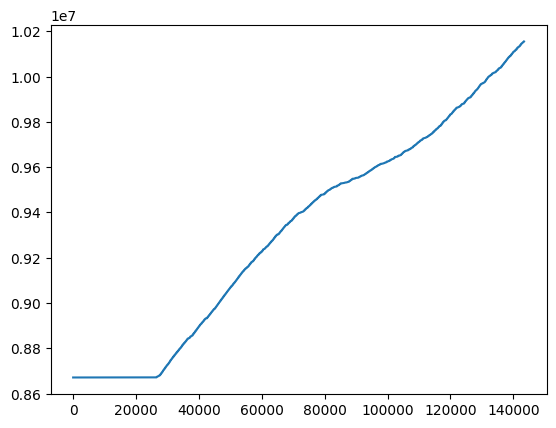

In [5]:
df['Cont_TotalEnergy(kWh)'].plot()

## Training Set

In [8]:
start_date='2022-06-01'
end_date='2023-01-01'

train_df = df.copy()
train_df = train_df[train_df['timestamp'] > pd.to_datetime(start_date)]
train_df = train_df[train_df['timestamp'] < pd.to_datetime(end_date)]

In [9]:
train_df

,timestamp,INV01_CurrentDC(A),INV01_CurrentAC(A),INV01_TotalEnergy(kWh),INV01_PowerAC(kW),INV01_PowerDC(kW),INV01_InternalTemperature(C),INV01_HeatSinkTemperature(C),INV01_VoltageDC(V),INV01_VoltageAC(V),...,relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),cloudcover (%),soil_temperature_7_to_28cm (°C),minute_sin,minute_cos,day_sin,day_cos,target
34153,2022-06-01 00:05:00,0.0,0.0,145517.08,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,17.4,0.0,10.0,23.7,0.500000,8.660254e-01,2.012985e-01,0.97953,0.0
34154,2022-06-01 00:10:00,0.0,0.0,145517.08,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,17.4,0.0,10.0,23.7,0.866025,5.000000e-01,2.012985e-01,0.97953,0.0
34155,2022-06-01 00:15:00,0.0,0.0,145517.08,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,17.4,0.0,10.0,23.7,1.000000,2.832769e-16,2.012985e-01,0.97953,0.0
34156,2022-06-01 00:20:00,0.0,0.0,145517.08,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,17.4,0.0,10.0,23.7,0.866025,-5.000000e-01,2.012985e-01,0.97953,0.0
34157,2022-06-01 00:25:00,0.0,0.0,145517.08,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,17.4,0.0,10.0,23.7,0.500000,-8.660254e-01,2.012985e-01,0.97953,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95566,2022-12-31 23:35:00,0.0,0.0,410725.44,0.0,0.0,0.0,0.0,0.0,0.0,...,97.0,7.7,0.0,0.0,11.9,-0.500000,-8.660254e-01,-2.449294e-16,1.00000,0.0
95567,2022-12-31 23:40:00,0.0,0.0,410725.44,0.0,0.0,0.0,0.0,0.0,0.0,...,97.0,7.7,0.0,0.0,11.9,-0.866025,-5.000000e-01,-2.449294e-16,1.00000,0.0
95568,2022-12-31 23:45:00,0.0,0.0,410725.44,0.0,0.0,0.0,0.0,0.0,0.0,...,97.0,7.7,0.0,0.0,11.9,-1.000000,-1.836970e-16,-2.449294e-16,1.00000,0.0
95569,2022-12-31 23:50:00,0.0,0.0,410725.44,0.0,0.0,0.0,0.0,0.0,0.0,...,97.0,7.7,0.0,0.0,11.9,-0.866025,5.000000e-01,-2.449294e-16,1.00000,0.0


In [10]:
train_df.to_csv("training_set.csv")

## Validation Set

In [11]:
start_date='2023-01-01'
end_date='2023-02-01'

val_df = df.copy()
val_df = val_df[val_df['timestamp'] > pd.to_datetime(start_date)]
val_df = val_df[val_df['timestamp'] < pd.to_datetime(end_date)]

In [12]:
val_df

,timestamp,INV01_CurrentDC(A),INV01_CurrentAC(A),INV01_TotalEnergy(kWh),INV01_PowerAC(kW),INV01_PowerDC(kW),INV01_InternalTemperature(C),INV01_HeatSinkTemperature(C),INV01_VoltageDC(V),INV01_VoltageAC(V),...,relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),cloudcover (%),soil_temperature_7_to_28cm (°C),minute_sin,minute_cos,day_sin,day_cos,target
95571,2023-01-01 00:05:00,0.0,0.0,410725.44,0.0,0.0,0.0,0.0,0.0,0.0,...,97.0,7.7,0.0,0.0,11.9,0.500000,8.660254e-01,2.012985e-01,0.97953,0.0
95572,2023-01-01 00:10:00,0.0,0.0,410725.44,0.0,0.0,0.0,0.0,0.0,0.0,...,97.0,7.7,0.0,0.0,11.9,0.866025,5.000000e-01,2.012985e-01,0.97953,0.0
95573,2023-01-01 00:15:00,0.0,0.0,410725.44,0.0,0.0,0.0,0.0,0.0,0.0,...,97.0,7.7,0.0,0.0,11.9,1.000000,2.832769e-16,2.012985e-01,0.97953,0.0
95574,2023-01-01 00:20:00,0.0,0.0,410725.44,0.0,0.0,0.0,0.0,0.0,0.0,...,97.0,7.7,0.0,0.0,11.9,0.866025,-5.000000e-01,2.012985e-01,0.97953,0.0
95575,2023-01-01 00:25:00,0.0,0.0,410725.44,0.0,0.0,0.0,0.0,0.0,0.0,...,97.0,7.7,0.0,0.0,11.9,0.500000,-8.660254e-01,2.012985e-01,0.97953,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104463,2023-01-31 23:35:00,0.0,0.0,431324.36,0.0,0.0,0.0,0.0,0.0,0.0,...,47.0,-2.3,0.0,44.0,9.5,-0.500000,-8.660254e-01,-2.449294e-16,1.00000,0.0
104464,2023-01-31 23:40:00,0.0,0.0,431324.36,0.0,0.0,0.0,0.0,0.0,0.0,...,47.0,-2.3,0.0,44.0,9.5,-0.866025,-5.000000e-01,-2.449294e-16,1.00000,0.0
104465,2023-01-31 23:45:00,0.0,0.0,431324.36,0.0,0.0,0.0,0.0,0.0,0.0,...,47.0,-2.3,0.0,44.0,9.5,-1.000000,-1.836970e-16,-2.449294e-16,1.00000,0.0
104466,2023-01-31 23:50:00,0.0,0.0,431324.36,0.0,0.0,0.0,0.0,0.0,0.0,...,47.0,-2.3,0.0,44.0,9.5,-0.866025,5.000000e-01,-2.449294e-16,1.00000,0.0


In [13]:
val_df.to_csv("validation_set.csv")

## Testing Set

In [14]:
start_date='2023-02-01'
end_date='2023-03-01'

test_df = df.copy()
test_df = test_df[test_df['timestamp'] > pd.to_datetime(start_date)]
test_df = test_df[test_df['timestamp'] < pd.to_datetime(end_date)]

In [16]:
test_df

,timestamp,INV01_CurrentDC(A),INV01_CurrentAC(A),INV01_TotalEnergy(kWh),INV01_PowerAC(kW),INV01_PowerDC(kW),INV01_InternalTemperature(C),INV01_HeatSinkTemperature(C),INV01_VoltageDC(V),INV01_VoltageAC(V),...,relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),cloudcover (%),soil_temperature_7_to_28cm (°C),minute_sin,minute_cos,day_sin,day_cos,target
104468,2023-02-01 00:05:00,0.00,0.0,431324.36,0.0,0.0,0.00,0.00,0.0,0.00,...,47.0,-2.3,0.0,44.0,9.5,0.500000,8.660254e-01,0.201299,0.979530,0.0
104469,2023-02-01 00:10:00,0.00,0.0,431324.36,0.0,0.0,0.00,0.00,0.0,0.00,...,47.0,-2.3,0.0,44.0,9.5,0.866025,5.000000e-01,0.201299,0.979530,0.0
104470,2023-02-01 00:15:00,0.00,0.0,431324.36,0.0,0.0,0.00,0.00,0.0,0.00,...,47.0,-2.3,0.0,44.0,9.5,1.000000,2.832769e-16,0.201299,0.979530,0.0
104471,2023-02-01 00:20:00,0.00,0.0,431324.36,0.0,0.0,0.00,0.00,0.0,0.00,...,47.0,-2.3,0.0,44.0,9.5,0.866025,-5.000000e-01,0.201299,0.979530,0.0
104472,2023-02-01 00:25:00,0.00,0.0,431324.36,0.0,0.0,0.00,0.00,0.0,0.00,...,47.0,-2.3,0.0,44.0,9.5,0.500000,-8.660254e-01,0.201299,0.979530,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,2023-02-28 23:35:00,179.75,232.3,461346.36,104.7,112.1,21.19,58.78,624.1,261.25,...,95.0,10.1,0.0,100.0,12.3,-0.500000,-8.660254e-01,-0.571268,0.820763,0.0
112500,2023-02-28 23:40:00,179.75,232.3,461346.36,104.7,112.1,21.19,58.78,624.1,261.25,...,95.0,10.1,0.0,100.0,12.3,-0.866025,-5.000000e-01,-0.571268,0.820763,0.0
112501,2023-02-28 23:45:00,179.75,232.3,461346.36,104.7,112.1,21.19,58.78,624.1,261.25,...,95.0,10.1,0.0,100.0,12.3,-1.000000,-1.836970e-16,-0.571268,0.820763,0.0
112502,2023-02-28 23:50:00,179.75,232.3,461346.36,104.7,112.1,21.19,58.78,624.1,261.25,...,95.0,10.1,0.0,100.0,12.3,-0.866025,5.000000e-01,-0.571268,0.820763,0.0


In [17]:
test_df.to_csv("test_set.csv")